# Euler vs. Runge-Kutta Integration
We will solve an ODE using Euler integration and RK4 and compare the results.
The ODE we will be solving is the following:
$$
\frac{df}{dx} = 2x \\ x \in \ [0,3] \  \\ f(0) = 0
$$

Analytically, we know the solution is 
$$
f(x) = x^2
$$

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def euler_integrate(x, x0, tspan, dt):
    t = np.arange(tspan[0], tspan[1]+dt, dt)
    sol = np.zeros(len(t))
    sol[0] = x0
    for i in range(len(t) - 1):
        sol[i + 1] = sol[i] + dt*x(t[i])
    return sol

def rk4_integrate(x,x0,tspan,dt):
    t = np.arange(tspan[0], tspan[1]+dt, dt)
    sol = np.zeros(len(t))
    sol[0] = x0
    for i in range(len(t) - 1):
        k1 = dt * x(t[i])
        k2 = dt * x(t[i] + k1/2.0)
        k3 = dt * x(t[i] + k2/2.0)
        k4 = dt * x(t[i] + k3)
        sol[i+1] = sol[i] + (1/6.0) * (k1+2.0*k2+2.0*k3+k4)
    return sol

def integrate(x,x0,tspan,dt,method='euler'):
    t = np.arange(tspan[0], tspan[1]+dt, dt)
    sol = np.zeros(len(t))
    sol[0] = x0

    if method.casefold() == "euler":
        for i in range(len(t) - 1):
            sol[i + 1] = sol[i] + dt*x(t[i])
    
    elif method.casefold() == "rk4":
        for i in range(len(t) - 1):
            k1 = dt * x(t[i])
            k2 = dt * x(t[i] + k1/2.0)
            k3 = dt * x(t[i] + k2/2.0)
            k4 = dt * x(t[i] + k3)
            sol[i+1] = sol[i] + (1/6.0) * (k1+2.0*k2+2.0*k3+k4)
    else:
        raise ValueError(f'No valid integration method "{method}"')

    return sol
    

In [18]:
# Define the ODE
dfdx = lambda x: np.exp(-x)

# Define the x range
x_range = [0,1]

# Define the initial condition
f0 = -1

# Discretize x and define a step size
dt = 0.1
x = np.arange(x_range[0], x_range[1]+dt,dt)

# Do Euler integration
y_euler = integrate(dfdx, f0, (0,1), dt, method='euler')

# Do RK4
y_RK4 = integrate(dfdx, f0, x_range, dt,method='rk4')

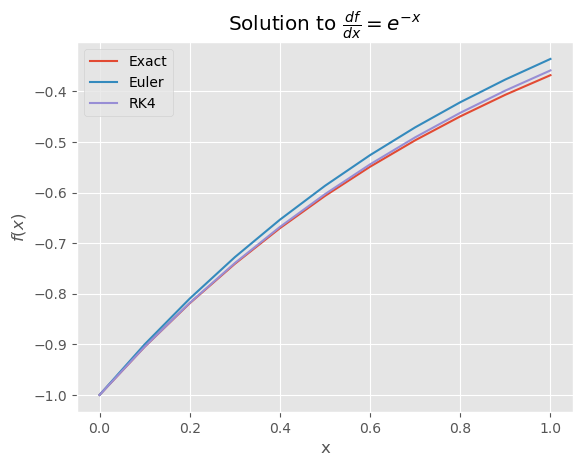

In [19]:
# Plot the result
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.plot(x,-np.exp(-x), label="Exact")
ax.plot(x,y_euler,label="Euler")
ax.plot(x,y_RK4,label="RK4")
ax.set(title=r"Solution to $\frac{df}{dx}=e^{-x}$")
ax.set(ylabel=r"$f(x)$",xlabel="x")
ax.legend()
plt.show()